# Git Storage Model

## Description
https://wiki/display/gqd/Git+Storage

gas_storage5

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os, sys
path = os.getcwd()
while not path.endswith('research'):    
    path = os.path.abspath(os.path.join(path, '../'))
sys.path.append(path)

In [17]:
import os, sys
import pandas as pd
import numpy as np
from datetime import datetime, date

In [5]:
#a number of utilities:
from gmt.fom.gas.shared.utils.common import pa
from gmt.fom.gas.shared.utils.dframe import ddff
from gmt.fom.gas.shared.utils.common import flatten_lst

In [6]:
from gmt.fom.gas.shared.models.git_storage.git_storage import GitStorageModel

In [7]:
import cmdty_storage

In [8]:
sys.path.append(r'C:\git\storage-master\samples\python')

In [9]:
import logging

In [10]:
logger = logging.getLogger()

In [11]:
logger.setLevel(logging.INFO)

# Market

## Forward

In [12]:
from gmt.fom.gas.shared.models.git_storage.data.fwd import Forward

In [13]:
forward = Forward(True,True,0.999)

In [14]:
forward.params

{'smooth_curve': True,
 'apply_weekend_shaping': True,
 'weekend_shaping_factor': 0.999}

<AxesSubplot:>

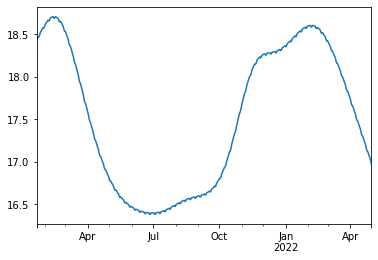

In [15]:
forward.curve.plot()

In [16]:
forward.curve

2021-01-20    18.440949
2021-01-21    18.456697
2021-01-22    18.472437
2021-01-23    18.469662
2021-01-24    18.485310
                ...    
2022-04-26    17.095956
2022-04-27    17.070184
2022-04-28    17.044411
2022-04-29    17.018637
2022-04-30    16.975871
Freq: D, Length: 466, dtype: float64

## IR

In [72]:
from gmt.fom.gas.shared.models.git_storage.data.ir import IR

In [73]:
ir = IR()

In [74]:
ir.curve

date
2021-04-25    0.005000
2021-04-26    0.005027
2021-04-27    0.005054
2021-04-28    0.005081
2021-04-29    0.005108
                ...   
2023-11-27    0.012588
2023-11-28    0.012591
2023-11-29    0.012594
2023-11-30    0.012597
2023-12-01    0.012600
Freq: D, Name: rate, Length: 951, dtype: float64

# Storage

In [75]:
from gmt.fom.gas.shared.models.git_storage.data.storage import Storage

In [87]:
str_type = 'SIMPLE'

if str_type == 'SIMPLE':
    storage = Storage('SIMPLE', 
                  freq='D',
                  storage_start='2021-04-01',
                  storage_end='2022-04-01',
                  injection_cost=0.01,
                  withdrawal_cost=0.025,
                  #Specific to SIMPLE type:
                  min_inventory=0.0,
                  max_inventory=1500.0,
                  max_injection_rate=25.5,
                  max_withdrawal_rate=30.9)
else:
    storage = Storage('RATCHETS', 
                  freq='D',
                  storage_start='2021-04-01',
                  storage_end='2022-04-01',
                  injection_cost=0.01,
                  withdrawal_cost=0.025,)

In [88]:
storage.params

{'storage_type': <StorageType.SIMPLE: 'SIMPLE'>,
 'freq': 'D',
 'storage_start': '2021-04-01',
 'storage_end': '2022-04-01',
 'injection_cost': 0.01,
 'withdrawal_cost': 0.025,
 'min_inventory': 0.0,
 'max_inventory': 1500.0,
 'max_injection_rate': 25.5,
 'max_withdrawal_rate': 30.9}

In [89]:
if storage.storage_type.value == 'RATCHETS':
    print(storage.ratchets)

# Calibrator

In [90]:
from gmt.fom.gas.shared.models.git_storage.calibrator import Calibrator

In [95]:
calibrator = Calibrator(spot_mean_reversion=30.0,
                        spot_vol=0.51,
                        long_term_vol=0.31,
                        seasonal_vol=0.2,
                        num_sims=4000,
                        basis_funcs= '1 + x_st + x_sw + x_lt + s + x_st**2 + x_sw**2 + x_lt**2 + s**2 + s * x_st',
                        seed=11,
                        seed_is_random=False,
                        fwd_sim_seed=13,
                        set_fwd_sim_seed=True,
                        extra_decisions=0,
                        num_inventory_grid_points=100,
                        numerical_tolerance=1e-10)

In [96]:
calibrator.params

{'spot_mean_reversion': 30.0,
 'spot_vol': 0.51,
 'long_term_vol': 0.31,
 'seasonal_vol': 0.2,
 'num_sims': 4000,
 'basis_funcs': '1 + x_st + x_sw + x_lt + s + x_st**2 + x_sw**2 + x_lt**2 + s**2 + s * x_st',
 'seed': 11,
 'seed_is_random': False,
 'fwd_sim_seed': 13,
 'set_fwd_sim_seed': True,
 'extra_decisions': 0,
 'num_inventory_grid_points': 100,
 'numerical_tolerance': 1e-10,
 'settlement_rule': <function gmt.fom.gas.shared.models.git_storage.calibrator.settlement_rule(delivery_date)>}

# Model

In [115]:
from gmt.fom.gas.shared.models.git_storage.git_storage import GitStorageModel

2021-05-18 11:55:53,150: C:\git\gmt-fom-gas-research\gmt\fom\gas\shared\models\git_storage\git_storage.py: 58: INFO: Fitting....
2021-05-18 11:55:53,511: cmdty.storage.multi-factor: 400: INFO: Compiling basis functions. Takes a few seconds on the first run..
2021-05-18 11:55:53,517: cmdty.storage.multi-factor: 402: INFO: Compilation of basis functions complete..
2021-05-18 11:55:53,522: cmdty.storage.multi-factor: 405: INFO: Calculating intrinsic value..
2021-05-18 11:55:54,104: cmdty.storage.multi-factor: 410: INFO: Calculation of intrinsic value complete..
2021-05-18 11:55:54,114: cmdty.storage.multi-factor: 413: INFO: Calculating LSMC value..
2021-05-18 11:55:54,123: cmdty.storage.multi-factor: 325: INFO: Starting regression spot price simulation..
2021-05-18 11:55:54,512: cmdty.storage.multi-factor: 325: INFO: Spot regression price simulation complete..
2021-05-18 11:55:54,519: cmdty.storage.multi-factor: 325: INFO: Starting backward induction..
2021-05-18 11:56:22,455: cmdty.stora

Full Value=32,525.8822
Intrinsic Value=27,799.3865
Extrinsic Value=4,726.4957


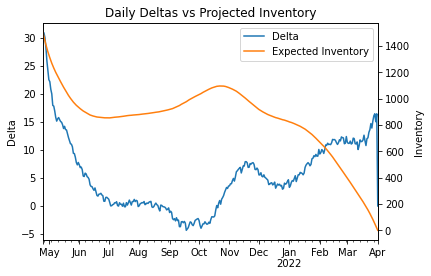

In [121]:
myModel = GitStorageModel(val_date='2021-04-25',
                          inventory=1500.0,
                          discount_deltas=False,
                          ir = ir,
                          forward=forward,
                          storage=storage, 
                          calibrator=calibrator
                          )
myModel.fit()
myModel.report()

In [122]:
myModel.deltas_frame

full_delta  intrinsic_delta
2021-04-25   30.887990             30.9
2021-04-26   30.853384             30.9
2021-04-27   30.000205             30.9
2021-04-28   28.324739             30.9
2021-04-29   25.878142             30.9
...                ...              ...
2022-03-28   16.062375             -0.0
2022-03-29   16.428299             -0.0
2022-03-30   15.014054             -0.0
2022-03-31   16.417279             -0.0
2022-04-01    0.000000              0.0

[342 rows x 2 columns]

In [123]:
myModel.trigger_prices_frame

inject_volume  inject_trigger_price  withdraw_volume  \
2021-04-25            NaN                   NaN            -30.9   
2021-04-26      25.500000             16.121758            -30.9   
2021-04-27      25.500000             16.122457            -30.9   
2021-04-28      25.500000             16.130826            -30.9   
2021-04-29      25.500000             16.138378            -30.9   
...                   ...                   ...              ...   
2022-03-27      25.500000             17.651894            -30.9   
2022-03-28      25.500000             17.650660            -30.9   
2022-03-29      11.604075             17.659561            -30.9   
2022-03-30            NaN                   NaN            -30.9   
2022-03-31            NaN                   NaN              NaN   

            withdraw_trigger_price  expected_inventory  fwd_price  
2021-04-25               16.163086         1500.000000  16.910901  
2021-04-26               16.164145         1469.100000  16.906905  
2021-04-27               16.165778         1438.237275  16.886554  
2021-04-28               16.179328         1408.297575  16.866772  
2021-04-29               16.208244         1380.205350  16.847555  
...                            ...                 ...        ...  
2022-03-27               17.729704           82.856550  17.839298  
2022-03-28               17.688489           67.198500  17.832719  
2022-03-29               17.694587           50.195925  17.808167  
2022-03-30               17.720925           33.178425  17.783506  
2022-03-31                     NaN           17.304975  17.758743  

[341 rows x 6 columns]

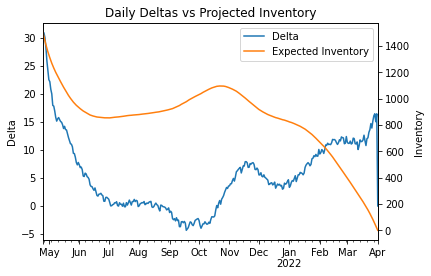

In [124]:
myModel.plot()

In [105]:
intr_delta = val_results_3f.intrinsic_profile['net_volume']; intr_delta

deltas_frame = pd.DataFrame(index=val_results_3f.deltas.index,
                        data={'full_delta': val_results_3f.deltas,
                              'intrinsic_delta': intr_delta});deltas_frame

2021-04-25    30.9
2021-04-26    30.9
2021-04-27    30.9
2021-04-28    30.9
2021-04-29    30.9
              ... 
2022-03-28    -0.0
2022-03-29    -0.0
2022-03-30    -0.0
2022-03-31    -0.0
2022-04-01     0.0
Freq: D, Name: net_volume, Length: 342, dtype: float64

In [109]:
active_fwd_curve = myModel.forward.curve[myModel.storage.cmdty_storage.start:
                                         myModel.storage.cmdty_storage.end]
trigger_prices_frame = val_results_3f.trigger_prices.copy()
trigger_prices_frame['expected_inventory'] = val_results_3f.expected_profile['inventory']
trigger_prices_frame['fwd_price'] = active_fwd_curve
trigger_prices_frame

inject_volume  inject_trigger_price  withdraw_volume  \
2021-04-25            NaN                   NaN            -30.9   
2021-04-26      25.500000             16.121758            -30.9   
2021-04-27      25.500000             16.122457            -30.9   
2021-04-28      25.500000             16.130826            -30.9   
2021-04-29      25.500000             16.138378            -30.9   
...                   ...                   ...              ...   
2022-03-27      25.500000             17.651894            -30.9   
2022-03-28      25.500000             17.650660            -30.9   
2022-03-29      11.604075             17.659561            -30.9   
2022-03-30            NaN                   NaN            -30.9   
2022-03-31            NaN                   NaN              NaN   

            withdraw_trigger_price  expected_inventory  fwd_price  
2021-04-25               16.163086         1500.000000  16.910901  
2021-04-26               16.164145         1469.100000  16.906905  
2021-04-27               16.165778         1438.237275  16.886554  
2021-04-28               16.179328         1408.297575  16.866772  
2021-04-29               16.208244         1380.205350  16.847555  
...                            ...                 ...        ...  
2022-03-27               17.729704           82.856550  17.839298  
2022-03-28               17.688489           67.198500  17.832719  
2022-03-29               17.694587           50.195925  17.808167  
2022-03-30               17.720925           33.178425  17.783506  
2022-03-31                     NaN           17.304975  17.758743  

[341 rows x 6 columns]

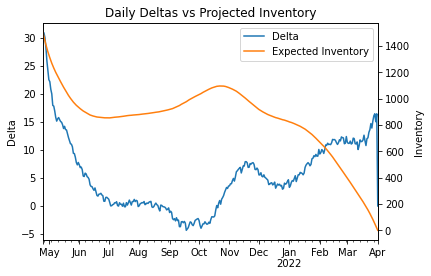

In [110]:
three_factor_results = val_results_3f

%matplotlib inline
ax_deltas = three_factor_results.deltas.plot(title='Daily Deltas vs Projected Inventory', legend=True, label='Delta')
ax_deltas.set_ylabel('Delta')
inventory_projection = three_factor_results.expected_profile['inventory']
ax_inventory = inventory_projection.plot(secondary_y=True, legend=True, ax=ax_deltas, label='Expected Inventory')
h1, l1 = ax_deltas.get_legend_handles_labels()
h2, l2 = ax_inventory.get_legend_handles_labels()
ax_inventory.set_ylabel('Inventory')
ax_deltas.legend(h1+h2, l1+l2, loc=1)

## Let's try to compute

In [ ]:
myModel.forward.curve

In [ ]:
from cmdty_storage import CmdtyStorage, three_factor_seasonal_value, MultiFactorModel, multi_factor, RatchetInterp

In [ ]:
myModel.storage.storage_type.value

In [ ]:
fwd_curve = myModel.forward.curve

In [ ]:
storage = CmdtyStorage(freq='D',
                      storage_start=myModel.storage.storage_start,
                      storage_end=myModel.storage.storage_end,
                      injection_cost=myModel.storage.injection_cost,
                      withdrawal_cost=myModel.storage.withdrawal_cost,
                      min_inventory=myModel.storage.min_inventory,
                      max_inventory=myModel.storage.max_inventory,
                      max_injection_rate=myModel.storage.max_injection_rate,
                      max_withdrawal_rate=myModel.storage.max_withdrawal_rate,
                      cmdty_consumed_inject=myModel.storage.cmdty_consumed_inject,
                      cmdty_consumed_withdraw=myModel.storage.cmdty_consumed_withdraw)

In [ ]:
myModel.ir.curve

In [ ]:
def twentieth_of_next_month(period): return period.asfreq('M').asfreq('D', 'end') + 20

In [ ]:
pd.Period(myModel.storage.storage_end, freq='D')

In [ ]:
twentieth_of_next_month(pd.Period(myModel.storage.storage_end, freq='D'))

In [ ]:
myModel.storage.storage_end

In [ ]:
interest_rate_curve = pd.Series(index=pd.period_range(myModel.asof,
twentieth_of_next_month(
pd.Period(myModel.storage.storage_end, freq='D')), freq='D'),
dtype='float64')

In [ ]:
interest_rate_curve[:] = myModel.ir.curve

In [ ]:
interest_rate_curve

In [ ]:
seed = None if myModel.calibrator.seed_is_random else myModel.calibrator.seed

In [ ]:
fwd_sim_seed = myModel.calibrator.fwd_sim_seed if myModel.calibrator.fwd_sim_seed else None

In [ ]:
import gmt.fom.gas.shared.config

In [ ]:
import logging

In [ ]:
logger = logging.getLogger()

In [ ]:
def on_progress(progress):
    logger.info(progress)
    

In [ ]:
val_results_3f = three_factor_seasonal_value(
    cmdty_storage = storage,
    val_date = myModel.asof,
    inventory=myModel.inventory,
    fwd_curve=fwd_curve,
    interest_rates=interest_rate_curve,
    settlement_rule=twentieth_of_next_month,
    spot_mean_reversion=myModel.calibrator.spot_mean_reversion,
    spot_vol=myModel.calibrator.spot_vol,
    long_term_vol=myModel.calibrator.long_term_vol,
    seasonal_vol=myModel.calibrator.seasonal_vol,
    num_sims=myModel.calibrator.num_sims,
    basis_funcs=myModel.calibrator.basis_funcs,
    discount_deltas=myModel.discount_deltas,
    seed=seed,
    fwd_sim_seed=fwd_sim_seed,
    extra_decisions=myModel.calibrator.extra_decisions,
    num_inventory_grid_points=myModel.calibrator.num_inventory_grid_points,
    on_progress_update=on_progress,
    numerical_tolerance=myModel.calibrator.numerical_tolerance
)

In [ ]:
params_dict = dict(cmdty_storage = storage,
    val_date = myModel.asof,
    inventory=myModel.inventory,
    fwd_curve=fwd_curve,
    interest_rates=interest_rate_curve,
    settlement_rule=twentieth_of_next_month,
    spot_mean_reversion=myModel.calibrator.spot_mean_reversion,
    spot_vol=myModel.calibrator.spot_vol,
    long_term_vol=myModel.calibrator.long_term_vol,
    seasonal_vol=myModel.calibrator.seasonal_vol,
    num_sims=myModel.calibrator.num_sims,
    basis_funcs=myModel.calibrator.basis_funcs,
    discount_deltas=myModel.discount_deltas,
    seed=seed,
    fwd_sim_seed=fwd_sim_seed,
    extra_decisions=myModel.calibrator.extra_decisions,
    num_inventory_grid_points=myModel.calibrator.num_inventory_grid_points,
    on_progress_update=on_progress,
    numerical_tolerance=myModel.calibrator.numerical_tolerance)

In [ ]:
storage

In [ ]:
params_dict['settlement_rule']

In [ ]:
import gmt.fom.gas.shared.models.git_storage.storage_gui as gui

In [ ]:
b = 5

gui.on_load_val_data_clicked(b)

gui.on_load_curve_params(b)

gui.on_import_fwd_curve_clicked(b)

gui.on_load_storage_details_clicked(b)

gui.on_load_vol_params_clicked(b)

gui.on_load_tech_params(b)

res = gui.btn_clicked(b)

# res_tpl = stb.utils.common.to_namedtuple(res, True)

In [ ]:
val_results_3f, deltas_frame, trigger_prices_frame = res

In [ ]:
trigger_prices_frame